[View in Colaboratory](https://colab.research.google.com/github/mdasadul/tensorflow_examples/blob/master/Spiral_keras.ipynb)

We are interested in classificaton. We will try 


1.   Binary Classification
2.   Multi-class classification

We will use Tensorflow backend of Keras for simplicity.

Before starting Let's loads some lirary


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.python.data import Dataset

np.random.seed(4375689)

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam
from keras.utils import np_utils


Using TensorFlow backend.


Let's create some data by simple function call

In [0]:

def create_spiral_data(N,D,K):
  X = np.zeros((N*K,D)) # data matrix (each row = single example)
  y = np.zeros(N*K, dtype='uint8') # class labels
  for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
  # lets visualize the data:
  return X,y



Let's create some sample data and ploat them

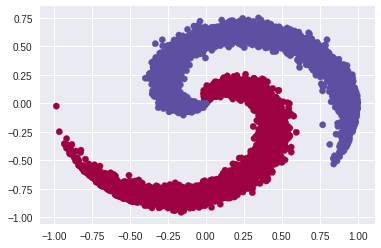

In [3]:
N = 5000 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X,y = create_spiral_data(N,D,K)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [0]:

def keras_model(train_x,train_y,num_outputs=1,loss='binary_crossentropy',final_activation="sigmoid",seed=1234, \
               num_epochs = 20):
  
  model = Sequential()
  model.add(Dense(32, activation='relu', input_shape=(2,)))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(num_outputs, activation=final_activation))

  model.compile(loss=loss, optimizer=Adam(),
                metrics=['accuracy'])

  history = model.fit(train_x, train_y,validation_split=0.10, batch_size=8, epochs=num_epochs, verbose=0)

  score = model.evaluate(train_x, train_y, verbose=0)
  print(model.summary())
  print("Accuracy %f"% (score[1]*100))
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                96        
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
None
Accuracy 99.700000
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


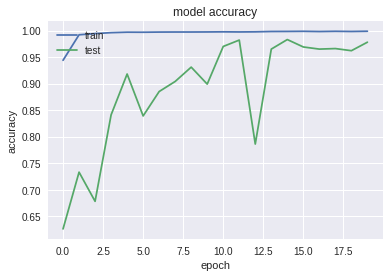

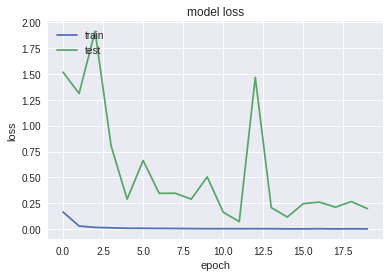

In [6]:

keras_model(X,y)

Let's extend it for muli-class classification problem. 

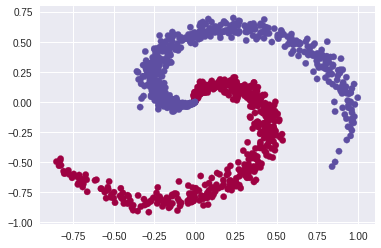

In [72]:
N = 500 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
x_k,y_k = create_spiral_data(N,D,K)
plt.scatter(x_k[:, 0], x_k[:, 1], c=y_k, s=40, cmap=plt.cm.Spectral)
plt.show()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 32)                96        
_________________________________________________________________
dense_129 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_130 (Dense)            (None, 16)                272       
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 17        
Total params: 913
Trainable params: 913
Non-trainable params: 0
_________________________________________________________________
None
Accuracy 98.600000
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


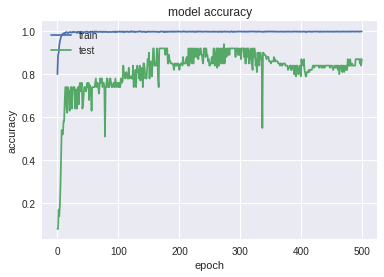

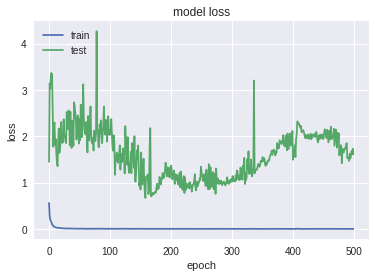

In [79]:
np.random.seed(1234)
train_y= np_utils.to_categorical(y_k)
keras_model(x_k,y_k,num_outputs = 1, loss='binary_crossentropy',final_activation='sigmoid',num_epochs=500)